# Homework 4

## First Part: Does basic house information reflect house's description?

The goal of this part of the homework, consists in implement two clustering process using K-means method, based on two differents criteria, and compare the results.

### Scraping

The data to be used in this analisys were scraped from the site www.inmobiliare.it. For each announcement we took information of: title, link, price, locali, superficie, bagni, piano and description and return a csv called 'datasetIndex.csv'. 

For more details about the scraping process, consult the 'scraper.py' file, available in the respository.

In [2]:
import pandas as pd

In [3]:
# Raw data, output form the sraping process
df = pd.read_csv("datasetIndex.csv")

In [4]:
df.head()

,Unnamed: 0,title,link,price,locali,superficie,bagni,piano,description
0,0,Nuovi Appartamenti e Attici / Mansarde in Vend...,https://www.immobiliare.it/nuove_costruzioni/R...,€ 192.000 - € 705.000,1 - 5,46.0,NaN,NaN,Le residenze di Rinascimento Quinto completano...
1,1,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",https://www.immobiliare.it/53131931-Vendita-Bi...,€ 225.000,2,50.0,1,1,PAPILLO EUR in elegante complesso residenziale...
2,2,"Trilocale via L'Aquila 33, Pigneto, Roma",https://www.immobiliare.it/68172417-Vendita-Tr...,€ 375.000,3,120.0,1,3,"Pigneto, Appartamento in Vendita, libero lumin..."
3,3,"Loft / Open Space via della Fontana 5, Trieste...",https://www.immobiliare.it/67991129-Vendita-Lo...,€ 68.000,2,20.0,1,T,Rif: 18066 - TRIESTE - Via della Fontana. Nell...
4,4,"Appartamento via Salvatore Quasimodo 113, Font...",https://www.immobiliare.it/70177030-Vendita-Ap...,€ 450.000,5,150.0,2,3,Zona EUR - Viale Cesare Pavese - Via Salvatore...


### Preprocessing

In order to have usefull information for the following analisys, we clean the data as follows:

On the text variables: drop null values, remove punctuation, remove stopwords, steam, among others. 

On the numeric variables: drop null values, drop no numeric characters as '€', replace characters as "T" in the column "piano", for 0, in addition to other details-

For the whole dataset, we drop the Unnamed column, and two outliers that seemed pertinent to eliminate, for having inconsistent data.

We have as a result of this process, a dataframe, called "datasetIndex_preprocessed.csv". For more details about the preprocessing, consult the 'preprocessing.py' file, available in the respository.

In [5]:
# Preproceced data; output of the preproceced process
df_preproceced = pd.read_csv("datasetIndex_preprocessed.csv")

In [92]:
df_preproceced.head()

,title,link,price,locali,superficie,bagni,piano,description
0,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",https://www.immobiliare.it/53131931-Vendita-Bi...,225000,2,50.0,1,1.0,papill eur eleg compless residenzial rifinitis...
1,"Trilocale via L'Aquila 33, Pigneto, Roma",https://www.immobiliare.it/68172417-Vendita-Tr...,375000,3,120.0,1,3.0,pigneto appart vendita liber lumin pian alto...
2,"Loft / Open Space via della Fontana 5, Trieste...",https://www.immobiliare.it/67991129-Vendita-Lo...,68000,2,20.0,1,0.0,rif triest via fontana nell immed vicin ...
3,"Appartamento via Salvatore Quasimodo 113, Font...",https://www.immobiliare.it/70177030-Vendita-Ap...,450000,5,150.0,2,3.0,zon eur vial ces paves via salvator quasim...
4,"Trilocale via del Cottanello, Pietralata, Roma",https://www.immobiliare.it/67401927-Vendita-Tr...,315000,3,92.0,2,5.0,fin spes relat l onorar notai caric esclus ...


### Datasets

Now, with the dataframe, preproceced, we proceed to create the two databases needed, the information matrix and the description matrix.

For this purpose, we created a file with the functions neded to compute both matrixes called 'matrixbuilder.py'

#### 1. Information Matrix:  
This matrix has the following format: $m_{ij} = value$ where $i \in \{announcement_1, ..., announcement_n\}$ and $j \in \{price, locali, superficie, bagni, piano \}$; were n is the number of the announcements. In practice we selected the columns of interest, of the preprocesed matrix from the previous step, and make an adjustment with the indexes. The indexes, in our case, corresponds to the ID of the announcement.

In [95]:
info_matrix = pd.read_csv("datastIndex_infmatrix.csv")

In [97]:
info_matrix.head()

,price,locali,superficie,bagni,piano
0,225000,2,50.0,1,1.0
1,375000,3,120.0,1,3.0
2,68000,2,20.0,1,0.0
3,450000,5,150.0,2,3.0
4,315000,3,92.0,2,5.0


#### 2. Description Matrix

This matrix has the following format: $m_{ij} = tfIdf_{ij}$ where $i \in \{announcement_1, ..., announcement_n\}$ and $j \in \{word_1, ...,word_m\}$; were n is the number of the announcements and m is the cardinality of the vocabulary. 

The definition used for tfidf was: $tfIdf = term$ $frequency * inverse$ $document$ $frequency$, were:
- $term$ $frequency =$ number of times that term $t$ occurs in document $d$.
- $inverse$ $document$ $frequency$ $= \log(\frac{D}{A})$; were $D =$ total number of documents and $A =$ number of documents where the term appears.

In practice, the information matrix, is a dataframe, were the rows are the announcements, recognized by the index, the columns corresponds to all the words on the documents, and the values the $tfIdf$ correspondent. 

In cases where the word does not appear in the document, the $tfIdf$ takes the value zero.

In [98]:
# Import the database 
tfidf_matrix_import = pd.read_csv("datasetIndex_tfidf.csv")
# Make a copy (it's going to be useful for creting the wordclouds)
tfidf_matrix = tfidf_matrix_import.copy()
# tfidf_matrix fisrts columns
tfidf_matrix.head()

,a,aa,aabb,aabitabile,aafm,aan,aappart,ab,abacus,abaitabile,...,ölkers,über,ültim,ün,üno,œ,„metr,•soggiorn,…a,…et
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more details about the construction of these matrices, consult the document 'matrixbuilder.py'.

### Clustering

At this point, we are ready to proceed clustering 

In [11]:
from sklearn.preprocessing import StandardScaler
import clustering as cl

#### Number of clusters & Elbow Method

With the aim of finding the appropiate number of clusters we used teh Elbow Method.

This method looks at the percentage of variance, explained as a function of the number of clusters: one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

In practical terms we defined a function, inside the clustering class, called find_elbow, that makes simulations, varying $k$, a variable that represents the number of clusters, and it varies from 1 to 10. At the end, we compute a plot, in order to make a decision based on the graphical simulations.

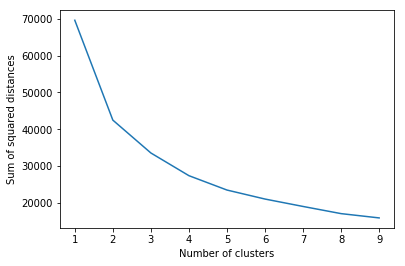

In [13]:
inf_kmeans = cl.KM(info_matrix)
inf_kmeans.find_elbow()

In [19]:
e_inf = 5

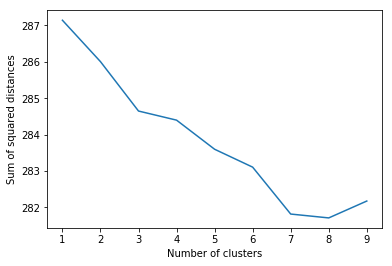

In [18]:
tfidf_kmeans = cl.KM(tfidf_matrix)
tfidf_kmeans.find_elbow()

In [44]:
# Number of clusters
e_tfidf = 7

#### Clustering information matrix

In [21]:
# Cluestring k-means information matrix
inf_clusters = inf_kmeans.clustering(e_inf)

In [107]:
for i in range(e_inf):
    print("cluster",i, " lenght:", len(inf_clusters[i]))

cluster 0  lenght: 5168
cluster 1  lenght: 423
cluster 2  lenght: 2424
cluster 3  lenght: 3589
cluster 4  lenght: 2327


In [109]:
for i in range (e_inf):
    print("Cluster", i)
    print(inf_clusters[i])

Cluster 0
[0, 2, 9, 13, 16, 18, 20, 27, 31, 34, 39, 40, 50, 55, 59, 60, 65, 73, 74, 75, 84, 93, 100, 110, 116, 128, 132, 135, 137, 138, 141, 143, 149, 156, 169, 190, 197, 202, 203, 205, 221, 228, 231, 234, 241, 250, 251, 252, 253, 254, 256, 257, 258, 260, 261, 262, 264, 265, 268, 269, 271, 274, 275, 279, 290, 297, 300, 315, 316, 319, 320, 321, 323, 324, 325, 326, 328, 331, 334, 339, 341, 344, 355, 356, 363, 369, 371, 373, 375, 378, 383, 385, 388, 389, 390, 395, 396, 397, 399, 406, 407, 411, 412, 428, 435, 436, 437, 439, 441, 442, 443, 450, 453, 456, 461, 464, 467, 477, 479, 480, 482, 483, 485, 486, 491, 494, 497, 498, 500, 503, 504, 505, 506, 509, 511, 512, 515, 517, 522, 529, 531, 532, 534, 535, 541, 542, 543, 544, 546, 555, 559, 563, 565, 566, 569, 572, 576, 581, 587, 590, 594, 595, 596, 600, 601, 608, 615, 620, 622, 624, 628, 633, 635, 637, 639, 642, 644, 647, 648, 649, 651, 652, 666, 670, 675, 677, 678, 680, 681, 689, 690, 692, 693, 695, 699, 700, 701, 703, 705, 709, 718, 725, 727,

#### Clustering Tf-Idf matrix

In [45]:
# Cluestring k-means information matrix
tfidf_clusters = tfidf_kmeans.clustering(e_tfidf)

In [103]:
for i in range(e_tfidf):
    print("cluster",i, " lenght:", len(tfidf_clusters[i]))

cluster 0  lenght: 8713
cluster 1  lenght: 3535
cluster 2  lenght: 274
cluster 3  lenght: 906
cluster 4  lenght: 156
cluster 5  lenght: 192
cluster 6  lenght: 155


In [108]:
for i in range (e_tfidf):
    print("Cluster", i)
    print(tfidf_clusters[i])

Cluster 0
[0, 3, 4, 5, 10, 11, 12, 15, 17, 18, 21, 22, 23, 28, 29, 30, 33, 35, 38, 41, 42, 45, 46, 47, 48, 51, 53, 54, 56, 57, 58, 60, 61, 62, 63, 66, 68, 69, 70, 71, 72, 76, 77, 78, 79, 80, 82, 83, 85, 86, 88, 89, 91, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 112, 115, 116, 117, 118, 119, 120, 122, 123, 125, 126, 128, 129, 130, 131, 134, 135, 136, 137, 139, 141, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 265, 270, 271, 273, 274, 275, 277, 278, 279, 281, 282, 283, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 304, 306, 3

#### Jaccard similarity  & similar pairs of clusters

In [58]:
sim = cl.JS(inf_clusters, tfidf_clusters)
top_3 = sim.find_top_3()
print("\n\nTop 3 pairs of similar clusters:\n")
print(top_3)



Top 3 pairs of similar clusters:

[(0, 0), (3, 1), (2, 3)]


#### Word cloud of house descriptions

In [86]:
import wordcloudgenerator as wcg

Wordcloud couple of clusters:  (0, 0)


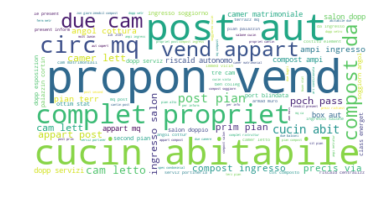

Wordcloud couple of clusters:  (3, 1)


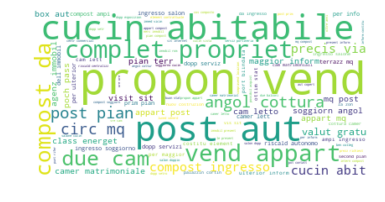

Wordcloud couple of clusters:  (2, 3)


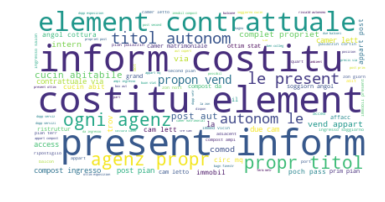

In [89]:
for i in range(len(top_3)):
    print("Wordcloud couple of clusters: ", top_3[i])
    L = tfidf_clusters[top_3[i][1]]
    wcg.WordCloud_generator(df_preproceced , L)